In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from matplotlib import pyplot as plt 
%matplotlib inline 

#Lê as entradas
f = open("dados_autent_bancaria.txt")
data = np.loadtxt(f, delimiter=',')

#Separa os dados para treino e teste
# 80% de cada classe para treino e 20% para teste
def split_data(data):
    class_a = []
    class_b = []
    for d in data:
        if(d[-1] == 0):
            class_a.append(d)
        else:
            class_b.append(d)
    
    num_class_a = len(class_a)
    num_class_b = len(class_b)
    
    # 80% de cada classe para treino
    split_point_a = round(num_class_a * 0.8) 
    split_point_b = round(num_class_b * 0.8)
    
    return np.array(class_a[:split_point_a]), np.array(class_a[split_point_a:]), np.array(class_b[:split_point_b]), np.array(class_b[split_point_b:])
    
train_a, test_a, train_b, test_b = split_data(data)

/home/minoro/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


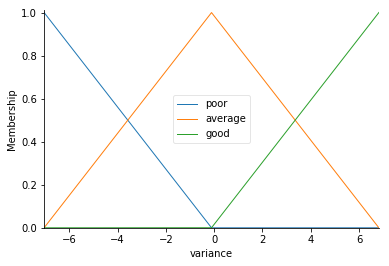

In [3]:

variance = ctrl.Antecedent(sorted(data[:, 0]), 'variance')
skewness = ctrl.Antecedent(sorted(data[:, 1]), 'skewness')
curtosis = ctrl.Antecedent(sorted(data[:, 2]), 'curtosis')
entropy = ctrl.Antecedent(sorted(data[:, 3]), 'entropy')


variance.automf(3)
skewness.automf(3)
curtosis.automf(3)
entropy.automf(3)


variance.view()
# skewness.view()
# curtosis.view()
# entropy.view()

In [ ]:



variance_data = sorted(data[:, 0])
min_v = variance_data[0]
max_v = variance_data[-1]

step = (max_v - min_v) / 2


print(min_v)
print(max_v)
print(step)

# Generate universe variables
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points
x_qual = np.arange(min_v, max_v, 0.1)
# x_serv = np.arange(0, 11, 1)
x_tip  = np.arange(0, 26, 1)

# Generate fuzzy membership functions
qual_lo = fuzz.trimf(x_qual, [min_v, min_v, (min_v + step)])
qual_md = fuzz.trimf(x_qual, [min_v, (min_v + step), max_v])
qual_hi = fuzz.trimf(x_qual, [(min_v + step), max_v, max_v])
# serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
# serv_md = fuzz.trimf(x_serv, [0, 5, 10])
# serv_hi = fuzz.trimf(x_serv, [5, 10, 10])
tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

print(qual_lo)

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))




# Turn off top/right axes
# ax0.spines['top'].set_visible(False)
# ax0.spines['right'].set_visible(False)
# ax0.get_xaxis().tick_bottom()
# ax0.get_yaxis().tick_left()
    
ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Variance')
ax0.legend()


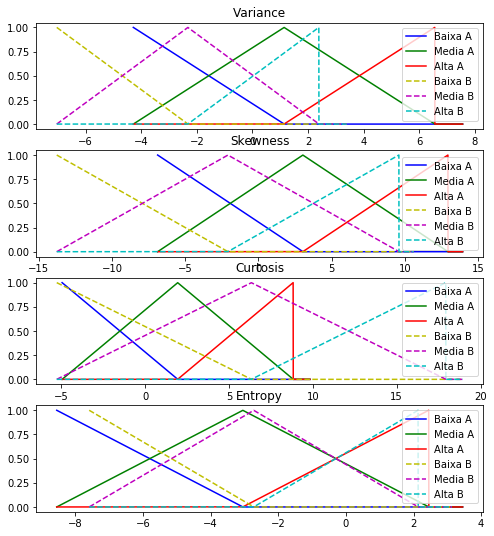

In [4]:
# print(train_a[:, 0])
def get_min_max_step(data):
    min_v = data[0]
    max_v = data[-1]

    step = (max_v - min_v) / 2
    
    return min_v, max_v, step

def build_trimf(data):
    min_v, max_v, step = get_min_max_step(data)
    x_data = np.arange(min_v, max_v + 1.001, 0.001)
    
    data_lo = fuzz.trimf(x_data, [min_v, min_v, (min_v + step)])
    data_md = fuzz.trimf(x_data, [min_v, (min_v + step), max_v])
    data_hi = fuzz.trimf(x_data, [(min_v + step), max_v, max_v])
    
    return data_lo, data_md, data_hi, x_data
    
variance_data_a = sorted(train_a[:, 0])
variance_data_b = sorted(train_b[:, 0])

skewness_data_a = sorted(train_a[:, 1])
skewness_data_b = sorted(train_b[:, 1])

curtosis_data_a = sorted(train_a[:, 2])
curtosis_data_b = sorted(train_b[:, 2])

entropy_data_a = sorted(train_a[:, 3])
entropy_data_b = sorted(train_b[:, 3])

variance_a_lo, variance_a_md, variance_a_hi, x_variance_data_a = build_trimf(variance_data_a)
variance_b_lo, variance_b_md, variance_b_hi, x_variance_data_b = build_trimf(variance_data_b)

skewness_a_lo, skewness_a_md, skewness_a_hi, x_skewness_data_a = build_trimf(skewness_data_a)
skewness_b_lo, skewness_b_md, skewness_b_hi, x_skewness_data_b = build_trimf(skewness_data_b)

curtosis_a_lo, curtosis_a_md, curtosis_a_hi, x_curtosis_data_a = build_trimf(curtosis_data_a)
curtosis_b_lo, curtosis_b_md, curtosis_b_hi, x_curtosis_data_b = build_trimf(curtosis_data_b)

entropy_a_lo, entropy_a_md, entropy_a_hi, x_entropy_data_a = build_trimf(entropy_data_a)
entropy_b_lo, entropy_b_md, entropy_b_hi, x_entropy_data_b = build_trimf(entropy_data_b)

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8, 9))


ax0.plot(x_variance_data_a, variance_a_lo, 'b', linewidth=1.5, label='Baixa A')
ax0.plot(x_variance_data_a, variance_a_md, 'g', linewidth=1.5, label='Media A')
ax0.plot(x_variance_data_a, variance_a_hi, 'r', linewidth=1.5, label='Alta A')

ax0.plot(x_variance_data_b, variance_b_lo, 'y--', linewidth=1.5, label='Baixa B')
ax0.plot(x_variance_data_b, variance_b_md, 'm--', linewidth=1.5, label='Media B')
ax0.plot(x_variance_data_b, variance_b_hi, 'c--', linewidth=1.5, label='Alta B')
ax0.set_title('Variance')
ax0.legend()



ax1.plot(x_skewness_data_a, skewness_a_lo, 'b', linewidth=1.5, label='Baixa A')
ax1.plot(x_skewness_data_a, skewness_a_md, 'g', linewidth=1.5, label='Media A')
ax1.plot(x_skewness_data_a, skewness_a_hi, 'r', linewidth=1.5, label='Alta A')

ax1.plot(x_skewness_data_b, skewness_b_lo, 'y--', linewidth=1.5, label='Baixa B')
ax1.plot(x_skewness_data_b, skewness_b_md, 'm--', linewidth=1.5, label='Media B')
ax1.plot(x_skewness_data_b, skewness_b_hi, 'c--', linewidth=1.5, label='Alta B')
ax1.set_title('Skewness')
ax1.legend()

ax2.plot(x_curtosis_data_a, curtosis_a_lo, 'b', linewidth=1.5, label='Baixa A')
ax2.plot(x_curtosis_data_a, curtosis_a_md, 'g', linewidth=1.5, label='Media A')
ax2.plot(x_curtosis_data_a, curtosis_a_hi, 'r', linewidth=1.5, label='Alta A')

ax2.plot(x_curtosis_data_b, curtosis_b_lo, 'y--', linewidth=1.5, label='Baixa B')
ax2.plot(x_curtosis_data_b, curtosis_b_md, 'm--', linewidth=1.5, label='Media B')
ax2.plot(x_curtosis_data_b, curtosis_b_hi, 'c--', linewidth=1.5, label='Alta B')
ax2.set_title('Curtosis')
ax2.legend()

ax3.plot(x_entropy_data_a, entropy_a_lo, 'b', linewidth=1.5, label='Baixa A')
ax3.plot(x_entropy_data_a, entropy_a_md, 'g', linewidth=1.5, label='Media A')
ax3.plot(x_entropy_data_a, entropy_a_hi, 'r', linewidth=1.5, label='Alta A')

ax3.plot(x_entropy_data_b, entropy_b_lo, 'y--', linewidth=1.5, label='Baixa B')
ax3.plot(x_entropy_data_b, entropy_b_md, 'm--', linewidth=1.5, label='Media B')
ax3.plot(x_entropy_data_b, entropy_b_hi, 'c--', linewidth=1.5, label='Alta B')
ax3.set_title('Entropy')
ax3.legend()


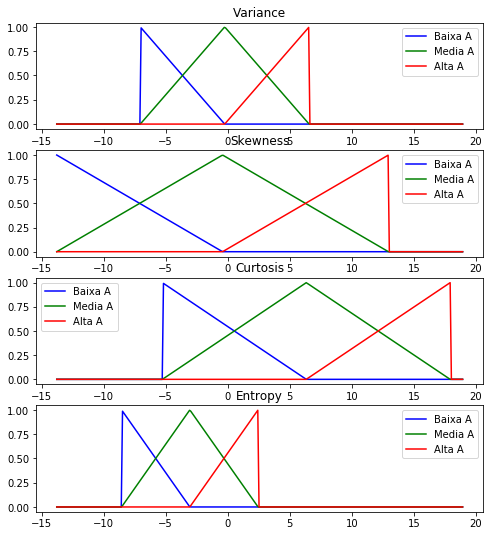

In [2]:
# print(train_a[:, 0])
def get_min_max_step(data):
    min_v = data[0]
    max_v = data[-1]

    step = (max_v - min_v) / 2
    
    return min_v, max_v, step

def build_trimf(data, min_abs, max_abs):
    min_v, max_v, step = get_min_max_step(data)
    x_data = np.arange(min_abs, max_abs + 1, 0.1)
    
    data_lo = fuzz.trimf(x_data, [min_v, min_v, (min_v + step)])
    data_md = fuzz.trimf(x_data, [min_v, (min_v + step), max_v])
    data_hi = fuzz.trimf(x_data, [(min_v + step), max_v, max_v])
    
    return data_lo, data_md, data_hi, x_data

# def pad_functions(var_f, ske_f, cur_f, ent_f):
#     max_x = max(var_f.shape[0], ske_f.shape[0], cur_f.shape[0], ent_f.shape[0])
    
        
    

variance_data = sorted(np.hstack((train_a[:, 0], train_b[:, 0])))
skewness_data = sorted(np.hstack((train_a[:, 1], train_b[:, 1])))
curtosis_data = sorted(np.hstack((train_a[:, 2], train_b[:, 2])))
entropy_data = sorted(np.hstack((train_a[:, 3], train_b[:, 3])))

min_abs = min(variance_data[0], skewness_data[0], curtosis_data[0],entropy_data[0])
max_abs = max(variance_data[-1], skewness_data[-1], curtosis_data[-1],entropy_data[-1])


variance_lo, variance_md, variance_hi, x_variance_data = build_trimf(variance_data, min_abs, max_abs)
skewness_lo, skewness_md, skewness_hi, x_skewness_data = build_trimf(skewness_data, min_abs, max_abs)
curtosis_lo, curtosis_md, curtosis_hi, x_curtosis_data = build_trimf(curtosis_data, min_abs, max_abs)
entropy_lo, entropy_md, entropy_hi, x_entropy_data = build_trimf(entropy_data, min_abs, max_abs)


variance_f = {'low':variance_lo, 'medium': variance_md, 'high': variance_hi}
skewness_f = {'low':skewness_lo, 'medium': skewness_md, 'high': skewness_hi}
curtosis_f = {'low':curtosis_lo, 'medium': curtosis_md, 'high': curtosis_hi}
entropy_f = {'low':entropy_lo, 'medium': entropy_md, 'high': entropy_hi}


# class_function_a =  fuzz.trimf([0], [0, 0, 0])
# class_function_b =  fuzz.trimf([1], [1, 1, 1])


# Visualize these universes and membership functions
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8, 9))


ax0.plot(x_variance_data, variance_lo, 'b', linewidth=1.5, label='Baixa A')
ax0.plot(x_variance_data, variance_md, 'g', linewidth=1.5, label='Media A')
ax0.plot(x_variance_data, variance_hi, 'r', linewidth=1.5, label='Alta A')
ax0.set_title('Variance')
ax0.legend()

ax1.plot(x_skewness_data, skewness_lo, 'b', linewidth=1.5, label='Baixa A')
ax1.plot(x_skewness_data, skewness_md, 'g', linewidth=1.5, label='Media A')
ax1.plot(x_skewness_data, skewness_hi, 'r', linewidth=1.5, label='Alta A')
ax1.set_title('Skewness')
ax1.legend()

ax2.plot(x_curtosis_data, curtosis_lo, 'b', linewidth=1.5, label='Baixa A')
ax2.plot(x_curtosis_data, curtosis_md, 'g', linewidth=1.5, label='Media A')
ax2.plot(x_curtosis_data, curtosis_hi, 'r', linewidth=1.5, label='Alta A')
ax2.set_title('Curtosis')
ax2.legend()

ax3.plot(x_entropy_data, entropy_lo, 'b', linewidth=1.5, label='Baixa A')
ax3.plot(x_entropy_data, entropy_md, 'g', linewidth=1.5, label='Media A')
ax3.plot(x_entropy_data, entropy_hi, 'r', linewidth=1.5, label='Alta A')
ax3.set_title('Entropy')
ax3.legend()



In [143]:
from collections import Counter

#combina as classes para gerar as regras
train_data = np.vstack((train_a[:], train_b[:]))

#retorna o valor ativo e o nível da ativação
def get_activated(lo, md, hi):
    activated = np.fmax(np.fmax(lo, md), hi)
    
    if activated == lo:
        return activated, 'low'
    if activated == md:
        return activated, 'medium'
    if activated == hi:
        return activated, 'high'
        
counter = Counter()
for v, s, c, e, cls in train_data:
    
    #calcula os níveis de ativação
    var_level_lo = fuzz.interp_membership(x_variance_data, variance_lo, v)
    var_level_md = fuzz.interp_membership(x_variance_data, variance_md, v)
    var_level_hi = fuzz.interp_membership(x_variance_data, variance_hi, v)
    
    ske_level_lo = fuzz.interp_membership(x_skewness_data, skewness_lo, s)
    ske_level_md = fuzz.interp_membership(x_skewness_data, skewness_md, s)
    ske_level_hi = fuzz.interp_membership(x_skewness_data, skewness_hi, s)
    
    cur_level_lo = fuzz.interp_membership(x_curtosis_data, curtosis_lo, c)
    cur_level_md = fuzz.interp_membership(x_curtosis_data, curtosis_md, c)
    cur_level_hi = fuzz.interp_membership(x_curtosis_data, curtosis_hi, c)
    
    ent_level_lo = fuzz.interp_membership(x_entropy_data, entropy_lo, e)
    ent_level_md = fuzz.interp_membership(x_entropy_data, entropy_md, e)
    ent_level_hi = fuzz.interp_membership(x_entropy_data, entropy_hi, e)
    
    #verifica qual parte da função foi 'ativada'
    var_level, var_activated  = get_activated(var_level_lo, var_level_md, var_level_hi)
    ske_level, ske_activated  = get_activated(ske_level_lo, ske_level_md, ske_level_hi)
    cur_level, cur_activated  = get_activated(cur_level_lo, cur_level_md, cur_level_hi)
    ent_level, ent_activated  = get_activated(ent_level_lo, ent_level_md, ent_level_hi)
    
    #gera um marcador com os níveis para o contador
    level_activated = '_'.join([var_activated, ske_activated, cur_activated, ent_activated, str(int(cls))])
    counter[level_activated] += 1
    
    
#Desempata as regras pelo valor mais comum
def get_most_commons_rules(counter):
    
    rules = dict()
    for activation, count in counter.most_common():
        activated = activation[0:-2]
        class_activated = activation[-1]
        
        if activated not in rules:
            rules[activated] = class_activated
    
    return rules

def build_fuzzy_system(rules, activation_functions):
    fuzzy_rules = []
    
    rule_class_a = np.zeros(activation_functions[0]['low'].shape)
    rule_class_a[0] = 1
    
    rule_class_b = np.zeros(activation_functions[0]['low'].shape)
    rule_class_b[-1] = 1
    
    print(rule_class_a)
    print(rule_class_b)
    
    
    for rule in rules:
        activated_class = rules[rule]
        activated_rules = rule.split('_')
        
#         print(activation_functions[0][activated_rules[0]])
#         print(activation_functions[1][activated_rules[1]])
    
        #faz um AND entre as regras
        rule_f = np.fmin(activation_functions[0][activated_rules[0]], activation_functions[1][activated_rules[1]])
        rule_f = np.fmin(rule_f, activation_functions[2][activated_rules[2]])
        rule_f = np.fmin(rule_f, activation_functions[3][activated_rules[3]])
        
        if int(activated_class) == 0:
            rule_f = np.fmin(rule_f, rule_class_a)
        else:
            rule_f = np.fmin(rule_f, rule_class_b)
        
#         print(np.fmin(rule_f, rule_class_a))
#         print(np.fmin(rule_f, rule_class_b))
    
        fuzzy_rules.append(rule_f)
        
    return fuzzy_rules

rules = get_most_commons_rules(counter)
fuzzy_rules = build_fuzzy_system(rules, [variance_f, skewness_f, curtosis_f, entropy_f])

# print(fuzzy_rules[8])
# fig, ax0 = plt.subplots(nrows=1, figsize=(5, 5))
# ax0.plot(x_variance_data, fuzzy_rules[0], 'b', linewidth=1.5, label='Baixa A')

print(rules)



[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[

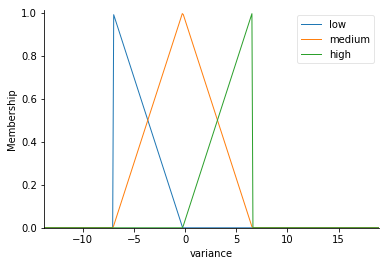

In [180]:
# print(x_variance_data)
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# [variance_f, skewness_f, curtosis_f, entropy_f]
# New Antecedent/Consequent objects hold universe variables and membership
# functions
variance_ant = ctrl.Antecedent(x_variance_data, 'variance')
skewness_ant = ctrl.Antecedent(x_skewness_data, 'skewness')
curtosis_ant = ctrl.Antecedent(x_curtosis_data, 'curtosis')
entropy_ant = ctrl.Antecedent(x_entropy_data, 'entropy')


cls = ctrl.Consequent(np.arange(0, 2, 1), 'cls')
cls['a'] = fuzz.trimf(cls.universe, [0, 0, 0])
cls['b'] = fuzz.trimf(cls.universe, [1, 1, 1])

antecedents = [variance_ant, skewness_ant, curtosis_ant, entropy_ant]
activation_functions = [variance_f, skewness_f, curtosis_f, entropy_f]

#passa as funções de ativação para os antecedentes
for antecerent, f in zip(antecedents, activation_functions):
    for activation in f:
        antecerent[activation] = f[activation]
        
        
variance_ant.view()


In [184]:

class_map = {0 : 'a', 1 : 'b'}
rule_bank = []
for rule in rules:
    activated_class = rules[rule]
    activated_rules = rule.split('_')
    
    activated_class = class_map[int(activated_class)]
    
    ctrl_rule = ctrl.Rule(variance_ant[activated_rules[0]] 
              & skewness_ant[activated_rules[1]] 
              & curtosis_ant[activated_rules[2]]
              & entropy_ant[activated_rules[3]],
              cls[activated_class])
    
    rule_bank.append(ctrl_rule)
    
    
cls_ctrl = ctrl.ControlSystem(rule_bank)
classifier = ctrl.ControlSystemSimulation(cls_ctrl)

num_acertos = 0
for v,s,c,e, target in np.vstack((test_a, test_b)):

    # Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
    # Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
    classifier.input['variance'] = v
    classifier.input['skewness'] = s
    classifier.input['curtosis'] = c
    classifier.input['entropy'] = e

    try:
        # Crunch the numbers
        classifier.compute()    
    except:
        continue
        
    output = classifier.output['cls']
    
    if output >= 0.5:
        predicted = 1
    else:
        predicted = 0      
    
    if int(target) == predicted:
        num_acertos += 1
    
#     break
    
# print(classifier.output['cls'])
# cls.view(sim=classifier)
print(num_acertos)
print('fim')


238
fim


In [71]:

num_acertos = 0

# print(test_a)
for v,s,c,e, cls in np.vstack((test_a, test_b)):
    
    var_level_lo = fuzz.interp_membership(x_variance_data, variance_lo, v)
    var_level_md = fuzz.interp_membership(x_variance_data, variance_md, v)
    var_level_hi = fuzz.interp_membership(x_variance_data, variance_hi, v)
    
    ske_level_lo = fuzz.interp_membership(x_skewness_data, skewness_lo, s)
    ske_level_md = fuzz.interp_membership(x_skewness_data, skewness_md, s)
    ske_level_hi = fuzz.interp_membership(x_skewness_data, skewness_hi, s)
    
    cur_level_lo = fuzz.interp_membership(x_curtosis_data, curtosis_lo, c)
    cur_level_md = fuzz.interp_membership(x_curtosis_data, curtosis_md, c)
    cur_level_hi = fuzz.interp_membership(x_curtosis_data, curtosis_hi, c)
    
    ent_level_lo = fuzz.interp_membership(x_entropy_data, entropy_lo, e)
    ent_level_md = fuzz.interp_membership(x_entropy_data, entropy_md, e)
    ent_level_hi = fuzz.interp_membership(x_entropy_data, entropy_hi, e)
    
    #verifica qual parte da função foi 'ativada'
    var_level, var_activated  = get_activated(var_level_lo, var_level_md, var_level_hi)
    ske_level, ske_activated  = get_activated(ske_level_lo, ske_level_md, ske_level_hi)
    cur_level, cur_activated  = get_activated(cur_level_lo, cur_level_md, cur_level_hi)
    ent_level, ent_activated  = get_activated(ent_level_lo, ent_level_md, ent_level_hi)

    level_activated = '_'.join([var_activated, ske_activated, cur_activated, ent_activated])
    
    
    if level_activated in rules:
        if int(rules[level_activated]) == int(cls):
            num_acertos += 1

print(num_acertos)
#         print(rules[level_activated])
    

239


In [133]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics 

train_data = np.vstack((train_a[:], train_b[:]))
test_data = np.vstack((test_a, test_b))

clf = MLPClassifier(activation='logistic', solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,2))

X = train_data[:, :-1]
y = train_data[:, -1]

clf.fit(X, y)
predicted_data = clf.predict(test_data[:, :-1])


print(metrics.accuracy_score(test_data[:, -1], predicted_data))
print(metrics.precision_score(test_data[:, -1], predicted_data))

num_acertos = 0

for predicted, expected in zip(predicted_data, test_data[:, -1]):
    if int(predicted) == int(expected):
        num_acertos += 1
    
print('Acertos = ', num_acertos)
print('Instâncias = ', test_data.shape[0])


1.0
1.0
Acertos =  274
Instâncias =  274
